# Adjacent Correlation Analysis

To use perform the adjacent correlation analysis

In [1]:
import numpy as np
import adjacent_correlation_analysis as aca
import matplotlib.pyplot as plt
import importlib
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings('ignore')

# load the data for the activator concentration
data_u = np.load('./tests/turing_pattern_U.npy')

# load the data for the inhibitor concentration
data_v = np.load('./tests/turing_pattern_V.npy')


Plotting the data

Text(0.5, 1.0, 'Inhibitor (V)')

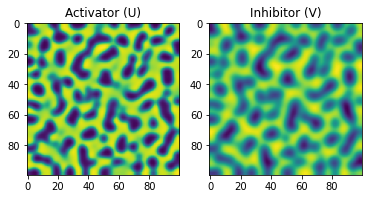

In [2]:
plt.subplot(121)
plt.imshow(data_u)
plt.title('Activator (U)')
plt.subplot(122)
plt.imshow(data_v)
plt.title('Inhibitor (V)')

## Method 1
Make the *adjacent correlation plot*, using **adjacent_correlation_plot** function:

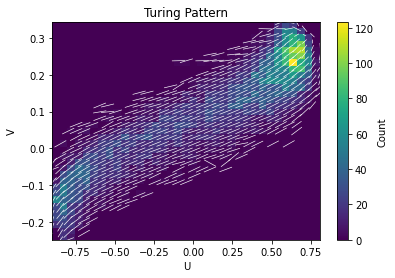

In [3]:
Ex, Ey, xedges, yedges, R = aca.adjacent_correlation_plot(data_u,data_v,bins=35,cmap='viridis',facecolor='w',scale=20, lognorm=False)
ax = plt.gca()
ax.set_xlabel('U')
ax.set_ylabel('V')
ax.set_title('Turing Pattern')
plt.show()

## Method 2

Make the adjacent correlation plot, using **compute_correlation_vector** function:

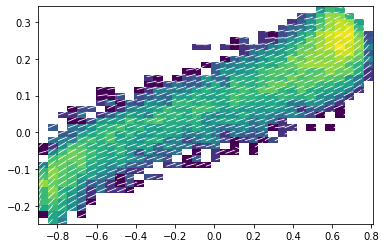

In [4]:
plt.figure()

h, xedges, yedges, im = plt.hist2d(data_u.flatten(), data_v.flatten(),bins=35, norm=LogNorm())

ex, ey = aca.compute_correlation_vector(data_u, data_v, xedges, yedges)

xx = np.linspace(xedges[0], xedges[-1], len(xedges)-1)
yy = np.linspace(yedges[0], yedges[-1], len(yedges)-1)
x_grid, y_grid = np.meshgrid(xx, yy)

# Plotting the result
plt.quiver(x_grid, y_grid, ex.T, ey.T, facecolor='w',angles='xy',scale=30,headaxislength=0)


## Visualizating the correlation degree p

$$p = (ex^2 + ey^2)^{1/2}$$


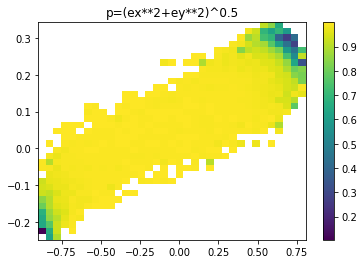

In [5]:
p = np.sqrt(ex**2 + ey**2)
plt.figure()
myextent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(p.T, origin='lower',extent=myextent,aspect='auto')
plt.title('p=(ex**2+ey**2)^0.5')
plt.colorbar()